In [86]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
data=pd.read_csv('df_relevant.csv')
data.head()

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE
0,12346,1,4,4,144
1,12347,4,1,4,414
2,12348,2,3,4,234
3,12349,3,2,4,324
4,12350,1,3,2,132


In [49]:
# Define the columns to transform
columns_to_transform = ['RSCORE', 'F SCORE', 'M SCORE']

# Apply Box-Cox transformation to each specified column
transformed_data = data.copy()  # Copy the original DataFrame to preserve it

for column in columns_to_transform:
    transformed_data[column], _ = boxcox(data[column] + 1)  # +1 to avoid issues with zero or negative values

# Save the transformed data to a new CSV file
transformed_data.to_csv('transformed_data.csv', index=False)

print("Transformed data has been saved to transformed_data.csv")

Transformed data has been saved to transformed_data.csv


In [50]:
transformed_data=pd.read_csv('transformed_data.csv')
transformed_data.head()

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE
0,12346,0.879444,2.880400,2.898055,144
1,12347,2.872286,0.880423,2.898055,414
2,12348,1.615100,2.276011,2.898055,234
3,12349,2.270598,1.618069,2.898055,324
4,12350,0.879444,2.276011,1.624517,132


In [52]:
columns_for_clustering = ['RSCORE', 'F SCORE', 'M SCORE']
clustering_data = transformed_data[columns_for_clustering]

In [75]:
# Function to add jitter
def add_jitter(arr, noise_level=0.1):
    return arr + np.random.randn(len(arr)) * noise_level

In [76]:
# Select the columns for clustering
columns_for_clustering = ['RSCORE', 'F SCORE', 'M SCORE']
clustering_data = transformed_data[columns_for_clustering]

# Apply K-Means clustering
number_of_clusters = 3  # You can change this number based on your requirement
kmeans = KMeans(n_clusters=number_of_clusters, random_state=42)
transformed_data['Cluster'] = kmeans.fit_predict(clustering_data)


In [77]:
# Get the cluster centers (centroids)
centroids = kmeans.cluster_centers_
print("Cluster centers (centroids):\n", centroids)

# Apply jitter to the data
transformed_data['RSCORE_Jitter'] = add_jitter(transformed_data['RSCORE'])
transformed_data['FSCORE_Jitter'] = add_jitter(transformed_data['F SCORE'])
transformed_data['MSCORE_Jitter'] = add_jitter(transformed_data['M SCORE'])


Cluster centers (centroids):
 [[2.07750397 2.38978706 1.47001585]
 [2.33075625 1.20018559 2.62177202]
 [0.87944381 2.4674371  1.33555844]]


In [85]:
import plotly.graph_objects as go
import plotly.express as px

# Create transformed data with jitter added
transformed_data['RSCORE_Jittered'] = transformed_data['RSCORE'] + transformed_data['RSCORE_Jitter']
transformed_data['FSCORE_Jittered'] = transformed_data['F SCORE'] + transformed_data['FSCORE_Jitter']
transformed_data['MSCORE_Jittered'] = transformed_data['M SCORE'] + transformed_data['MSCORE_Jitter']

# Create a 3D scatter plot with jitter
fig = px.scatter_3d(
    transformed_data,
    x='RSCORE_Jittered',
    y='FSCORE_Jittered',
    z='MSCORE_Jittered',
    color='Cluster',
    title='3D Cluster Plot',
    opacity=0.7
)

# Add cluster centers to the plot using graph_objects
fig.add_trace(
    go.Scatter3d(
        x=centroids[:, 0],
        y=centroids[:, 1],
        z=centroids[:, 2],
        mode='markers',
        marker=dict(
            size=10,
            color='red',
            symbol='cross'
        ),
        name='Centroids'
    )
)

# Update the layout to make the plot bigger
fig.update_layout(
    width=1200,  # Width of the figure
    height=800,  # Height of the figure
    scene=dict(
        xaxis_title='RSCORE',
        yaxis_title='F SCORE',
        zaxis_title='M SCORE'
    )
)

# Show the plot
fig.show()



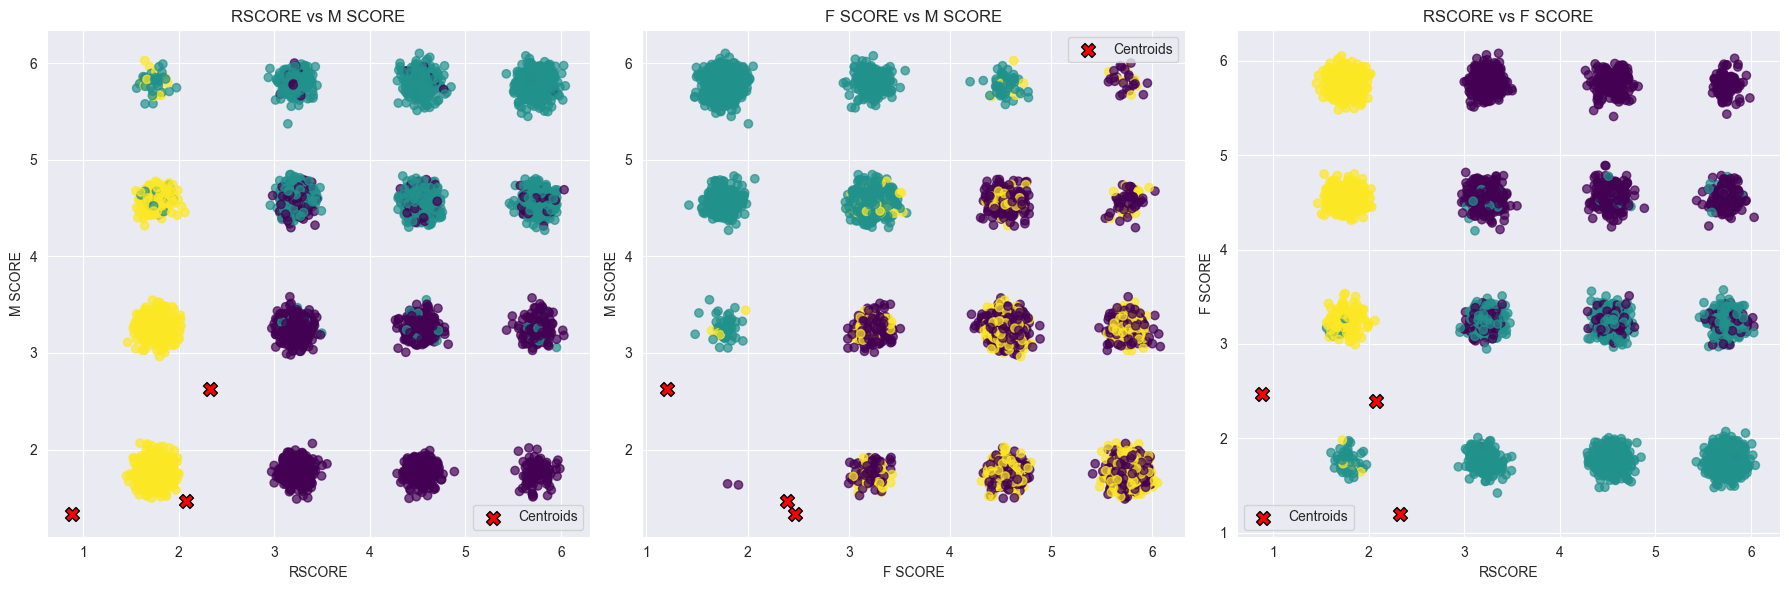

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot RSCORE vs M SCORE with jitter
axes[0].scatter(
    transformed_data['RSCORE'] + transformed_data['RSCORE_Jitter'],
    transformed_data['M SCORE'] + transformed_data['MSCORE_Jitter'],
    c=transformed_data['Cluster'],
    cmap='viridis',
    alpha=0.7
)
axes[0].scatter(
    centroids[:, 0],
    centroids[:, 2],
    c='red',
    edgecolors='k',
    s=100,
    marker='X',
    label='Centroids'
)
axes[0].set_xlabel('RSCORE')
axes[0].set_ylabel('M SCORE')
axes[0].set_title('RSCORE vs M SCORE')
axes[0].legend()

# Plot F SCORE vs M SCORE with jitter
axes[1].scatter(
    transformed_data['F SCORE'] + transformed_data['FSCORE_Jitter'],
    transformed_data['M SCORE'] + transformed_data['MSCORE_Jitter'],
    c=transformed_data['Cluster'],
    cmap='viridis',
    alpha=0.7
)
axes[1].scatter(
    centroids[:, 1],
    centroids[:, 2],
    c='red',
    edgecolors='k',
    s=100,
    marker='X',
    label='Centroids'
)
axes[1].set_xlabel('F SCORE')
axes[1].set_ylabel('M SCORE')
axes[1].set_title('F SCORE vs M SCORE')
axes[1].legend()

# Plot RSCORE vs F SCORE with jitter
axes[2].scatter(
    transformed_data['RSCORE'] + transformed_data['RSCORE_Jitter'],
    transformed_data['F SCORE'] + transformed_data['FSCORE_Jitter'],
    c=transformed_data['Cluster'],
    cmap='viridis',
    alpha=0.7
)
axes[2].scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    edgecolors='k',
    s=100,
    marker='X',
    label='Centroids'
)
axes[2].set_xlabel('RSCORE')
axes[2].set_ylabel('F SCORE')
axes[2].set_title('RSCORE vs F SCORE')
axes[2].legend()

# Display the plot
plt.tight_layout()
plt.show()



In [87]:

# Extract features used for clustering
features = transformed_data[['RSCORE', 'F SCORE', 'M SCORE']].values

# Calculate silhouette scores
silhouette_vals = silhouette_samples(features, transformed_data['Cluster'])
silhouette_avg = silhouette_score(features, transformed_data['Cluster'])

# Append silhouette scores to the transformed_data DataFrame
transformed_data['Silhouette Score'] = silhouette_vals


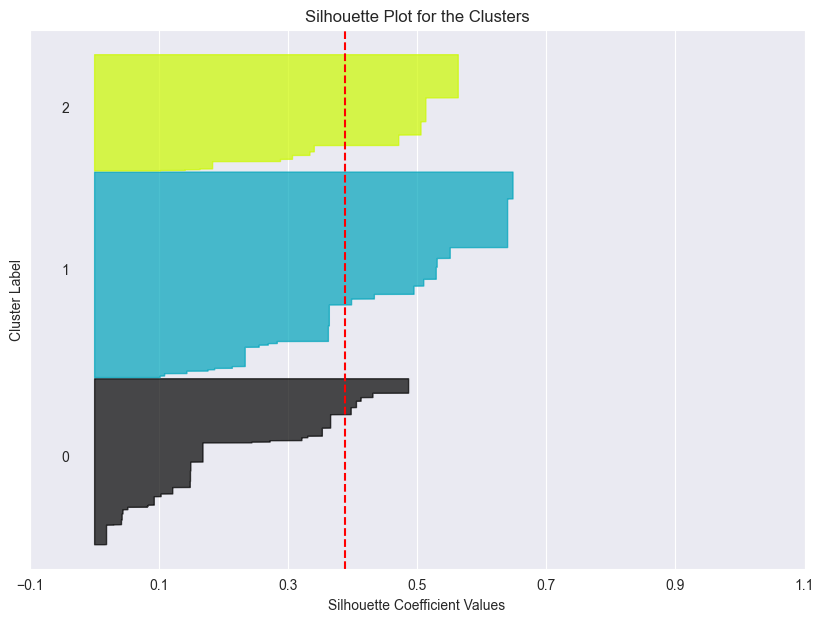

In [91]:
# Number of clusters
n_clusters = len(np.unique(transformed_data['Cluster']))
cluster_labels = transformed_data['Cluster']

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 7))

# Initialize the y_lower for the silhouette plot
y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples in cluster i
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    # Define the color for each cluster
    color = plt.cm.nipy_spectral(float(i) / n_clusters)

    # Fill between silhouette scores
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )

    # Label the silhouette plots with their cluster numbers in the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

# Plot the silhouette average score as a vertical line
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_title("Silhouette Plot for the Clusters")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")

# Clear the y-axis labels
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()
